<a href="https://colab.research.google.com/github/acekanth/hello-world/blob/master/AutoTS_Billing_20210408_2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install auto_ts

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import pandas as pd
import numpy as np

In [3]:
import auto_ts as AT

Imported auto_timeseries version:0.0.36. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
def parse(x):
  return datetime.striptime(x, '%Y-%m')

In [6]:
billing_data = read_csv('/gdrive/My Drive/AIML/Budget_Billing-Pattern.csv',parse_dates={'time':['Year','Month']},)

In [7]:
billing_data.head()

,time,BilledAmount
0,2015-01-01,1495573889
1,2015-02-01,2677319369
2,2015-03-01,3017270141
3,2015-04-01,3371122481
4,2015-05-01,3171867579


In [8]:
#Consider year-wise splitting of dataset for better prediction
#keep last year data for testing

#****************** Lessons Learned **********************
#*** For predictions, auto-ts library expects an empty dataset with required time period ******
df_len = int(len(billing_data)/12)
split_index = int((df_len-1)*12)
split_index

60

In [9]:
train = billing_data[:split_index]
test =  billing_data[split_index:]
train.shape, test.shape

((60, 2), (12, 2))

In [10]:
train[-2:]

,time,BilledAmount
58,2019-11-01,5383260036
59,2019-12-01,9591436321


In [11]:
test[0:1]

,time,BilledAmount
60,2020-01-01,686773681


In [12]:
ts_column = 'time'
target = 'BilledAmount'

In [13]:
ml_dict = AT.auto_timeseries(score_type='rmse',time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Error: Stationary test failed. Data must be np.array. Check your input and try stationary test again
    Target variable given as = BilledAmount
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: time sep: , target: BilledAmount
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (60, 1)


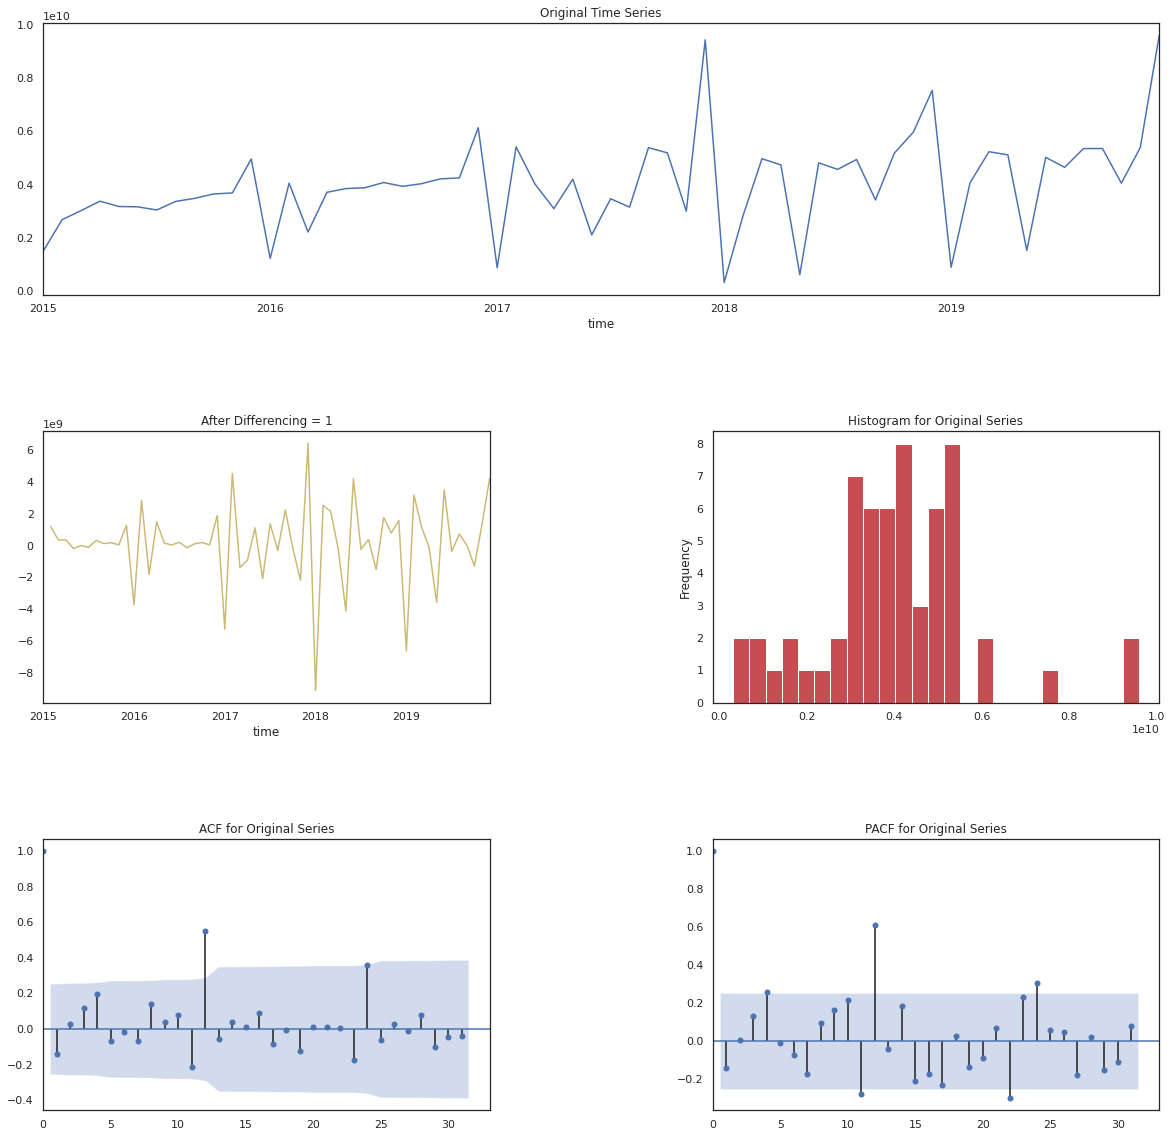

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(60, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 35 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 2,189,136,243.11
    Std Deviation of actuals = 2,994,206,772.06
    Normalized RMSE = 73%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 40 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 1,592,154,066.76
    Std Deviation of actuals = 1,619,552,247.11
    Normalized RMSE = 98%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 45 Test Shape: 5
    Root Mean Squared Error predic

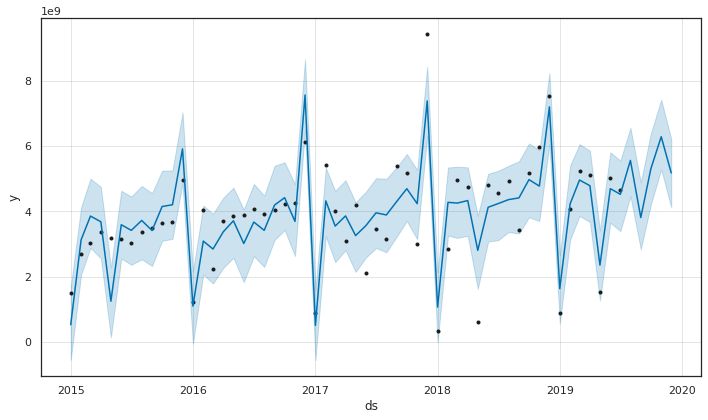

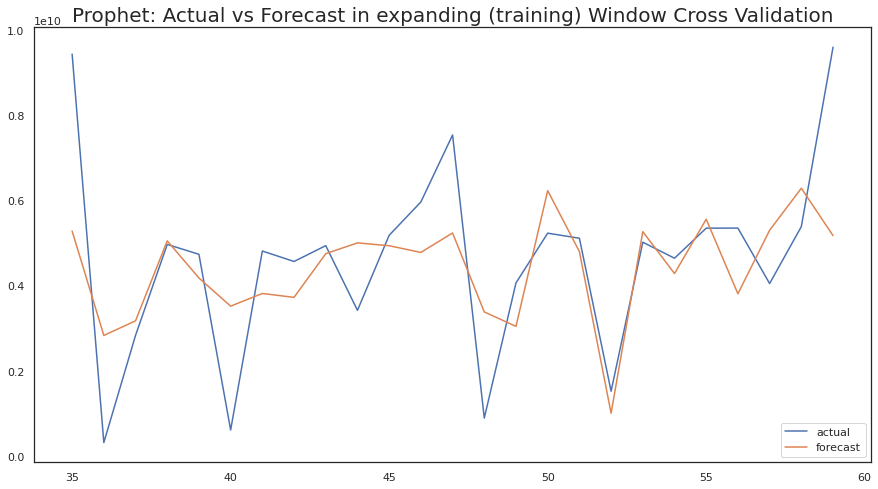

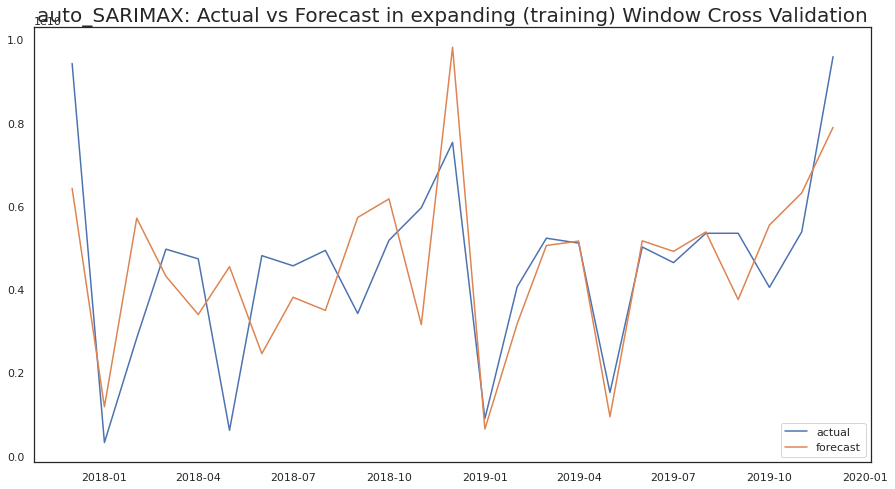

In [14]:
ml_dict.fit(traindata=train, ts_column=ts_column, target=target, cv=5, sep=",")

In [15]:
predictions = ml_dict.predict( testdata = test, model = 'best')

In [16]:
predictions.yhat.to_csv('test_predictions.csv')

In [17]:
(predictions[['yhat']]).to_csv('test_predictions.csv')

In [18]:
!cp test_predictions.csv /gdrive/My\ Drive/AIML/test_predictions.csv

In [19]:
!ls /gdrive/My\ Drive/AIML -l

total 2746
dr-x------ 2 root root    4096 Nov  4  2018  AIML_LABS_BLR_2
-rw------- 1 root root 1023595 Apr  9 01:52  AutoTS_Billing_20210408_2000.ipynb
-rw------- 1 root root  351529 Apr  8 07:00  AutoTS_Billing.ipynb
-rw------- 1 root root    1409 Apr  8 05:04  Budget_Billing-Pattern.csv
-rw------- 1 root root    1844 Apr  8 07:14  Budget_PC_Billing_Pattern.csv
drwx------ 2 root root    4096 Jul 15  2019  CrowdCounting-Bosch
drwx------ 2 root root    4096 Feb 21  2019  Hackathon-3
drwx------ 2 root root    4096 Oct 25  2019  IIIT-H
drwx------ 2 root root    4096 Jul 13  2019  Misc
-rw------- 1 root root  121601 Nov 13  2019  plot_calibration.ipynb
drwx------ 2 root root    4096 May 23  2020  Skill_Fungibility
-rw------- 1 root root 1282629 Nov 13  2019  stackoverflow-classifier.ipynb
-rw------- 1 root root     151 Apr  8 16:34 'test_predictions (1).gsheet'
-rw------- 1 root root     353 Apr  9 01:53  test_predictions.csv
-rw------- 1 root root     151 Apr  8 16:46  test_predictions.gs

In [20]:
predictions

BilledAmount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2020-01-01,7.567645e+08,1.203844e+09,-1.602726e+09,3.116255e+09
2020-02-01,3.900274e+09,1.327504e+09,1.298414e+09,6.502134e+09
2020-03-01,5.948292e+09,1.345143e+09,3.311861e+09,8.584723e+09
2020-04-01,5.429233e+09,1.383300e+09,2.718015e+09,8.140451e+09
2020-05-01,1.676863e+09,1.384775e+09,-1.037246e+09,4.390972e+09
2020-06-01,5.405429e+09,1.388252e+09,2.684506e+09,8.126353e+09
2020-07-01,4.985123e+09,1.390064e+09,2.260648e+09,7.709599e+09
2020-08-01,5.617252e+09,1.390077e+09,2.892752e+09,8.341753e+09
2020-09-01,5.668592e+09,1.390420e+09,2.943419e+09,8.393765e+09
2020-10-01,4.372442e+09,1.390472e+09,1.647167e+09,7.097716e+09


In [22]:
#give empty test dataframe having additional period for forecasting
val = pd.DataFrame({'BilledAmount':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
x = ml_dict.predict( testdata = val, model = 'best')
x

BilledAmount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2020-01-01,7.567645e+08,1.203844e+09,-1.602726e+09,3.116255e+09
2020-02-01,3.900274e+09,1.327504e+09,1.298414e+09,6.502134e+09
2020-03-01,5.948292e+09,1.345143e+09,3.311861e+09,8.584723e+09
2020-04-01,5.429233e+09,1.383300e+09,2.718015e+09,8.140451e+09
2020-05-01,1.676863e+09,1.384775e+09,-1.037246e+09,4.390972e+09
2020-06-01,5.405429e+09,1.388252e+09,2.684506e+09,8.126353e+09
2020-07-01,4.985123e+09,1.390064e+09,2.260648e+09,7.709599e+09
2020-08-01,5.617252e+09,1.390077e+09,2.892752e+09,8.341753e+09
2020-09-01,5.668592e+09,1.390420e+09,2.943419e+09,8.393765e+09
2020-10-01,4.372442e+09,1.390472e+09,1.647167e+09,7.097716e+09


In [23]:
billing_pc_data = read_csv('/gdrive/My Drive/AIML/Budget_PC_Billing_Pattern.csv',parse_dates={'time':['Year','Month']},)

In [24]:
billing_pc_data

,time,PC,BilledAmount
0,2015-01-01,15598,1495573889
1,2015-02-01,15598,2677319369
2,2015-03-01,15771,3017270141
3,2015-04-01,15944,3371122481
4,2015-05-01,16092,3171867579
...,...,...,...
67,2020-08-01,20593,5229801635
68,2020-09-01,20753,4877444978
69,2020-10-01,20681,1383242561
70,2020-11-01,20645,5056037033


In [25]:
# df_len_pc = len(billing_pc_data)
# split_index_pc = int(df_len_pc*0.67)
df_len_pc = int(len(billing_pc_data)/12)
split_index_pc = int((df_len_pc-1)*12)
split_index_pc

60

In [26]:
train_pc = billing_pc_data[:split_index_pc]
test_pc =  billing_pc_data[split_index_pc:]

In [27]:
ts_column_pc = 'time'
target_pc = 'BilledAmount'

In [29]:
ml_dict_pc = AT.auto_timeseries(score_type='rmse',time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Error: Stationary test failed. Data must be np.array. Check your input and try stationary test again
    Target variable given as = BilledAmount
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: time sep: , target: BilledAmount
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (60, 2)


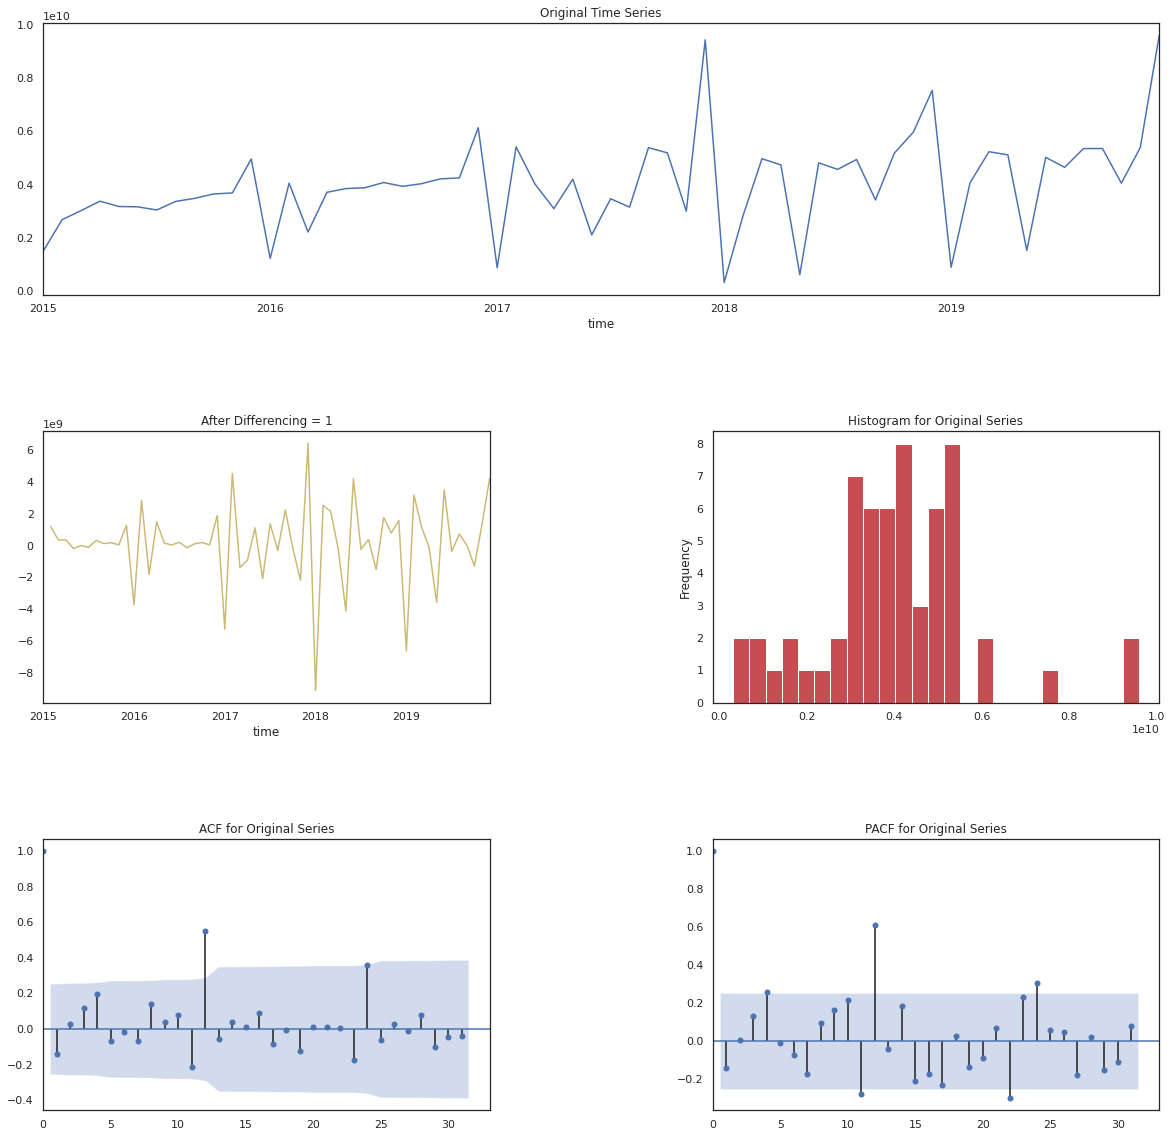

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(60, 3)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 35 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 2,189,136,243.11
    Std Deviation of actuals = 2,994,206,772.06
    Normalized RMSE = 73%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 40 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 1,592,154,066.76
    Std Deviation of actuals = 1,619,552,247.11
    Normalized RMSE = 98%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 45 Test Shape: 5
    Root Mean Squared Error predic

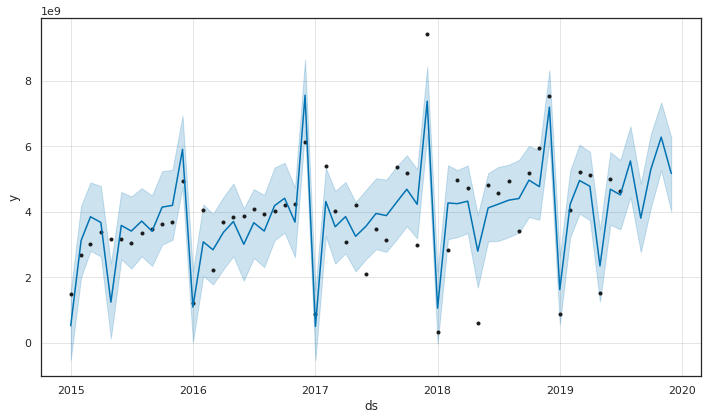

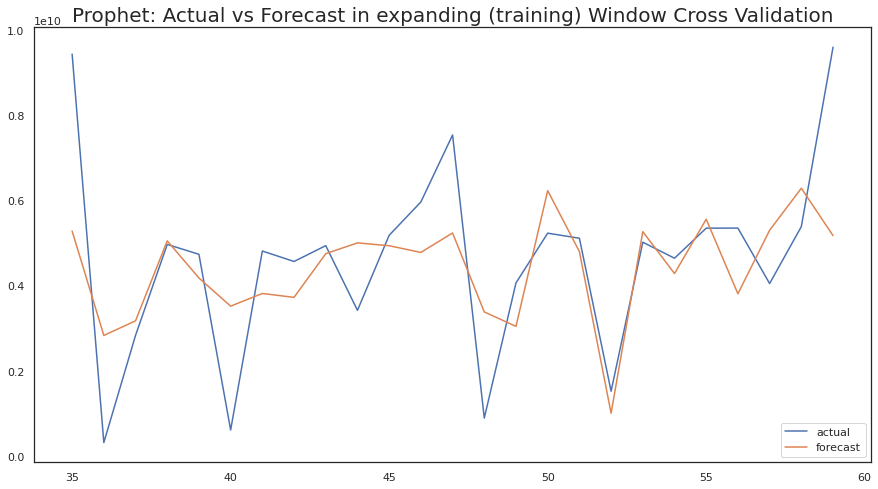

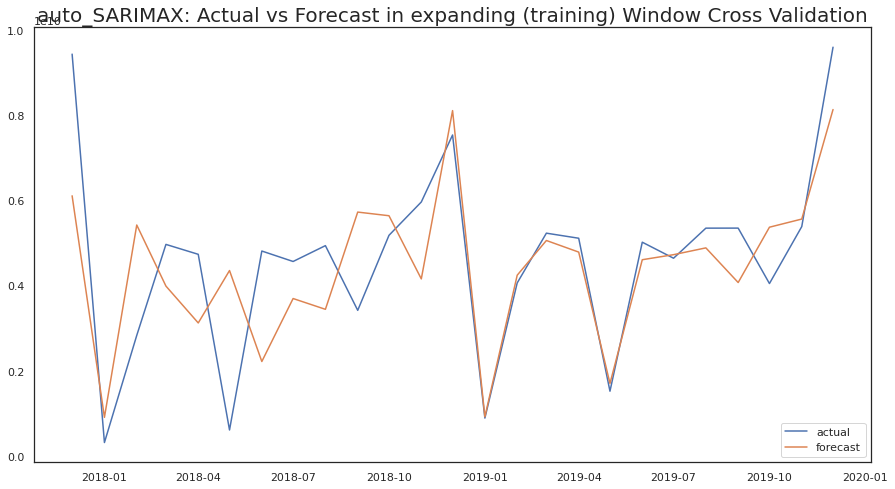

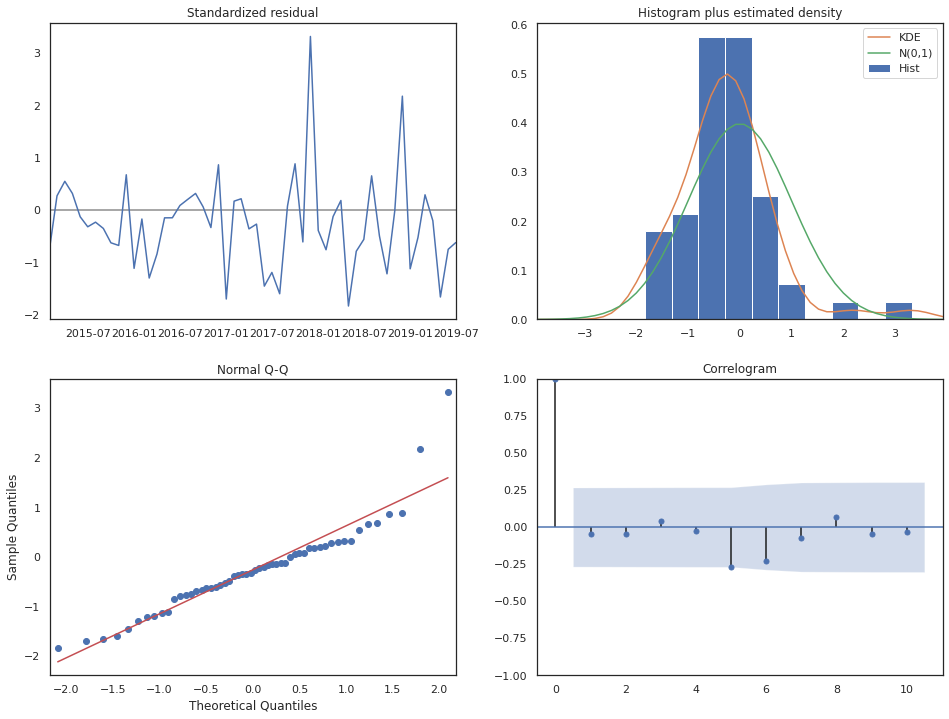

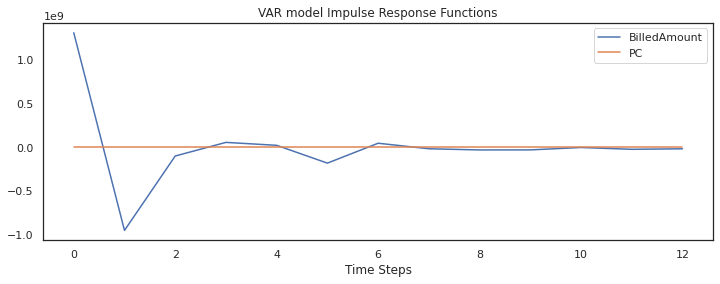

In [30]:
ml_dict_pc.fit(traindata=train_pc, ts_column=ts_column, target=target_pc, cv=5, sep=",")

In [50]:
predictions_pc = ml_dict_pc.predict(testdata = test_pc, model = 'best')

In [51]:
predictions_pc

BilledAmount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2020-01-01,1.165278e+09,1.268854e+09,-1.321630e+09,3.652185e+09
2020-02-01,4.169033e+09,1.414883e+09,1.395913e+09,6.942154e+09
2020-03-01,5.781784e+09,1.414883e+09,3.008664e+09,8.554904e+09
2020-04-01,5.538819e+09,1.414883e+09,2.765699e+09,8.311939e+09
2020-05-01,1.655857e+09,1.414883e+09,-1.117263e+09,4.428977e+09
2020-06-01,5.497570e+09,1.414883e+09,2.724449e+09,8.270690e+09
2020-07-01,4.998424e+09,1.414883e+09,2.225304e+09,7.771544e+09
2020-08-01,5.530924e+09,1.414883e+09,2.757804e+09,8.304044e+09
2020-09-01,4.857265e+09,1.414883e+09,2.084145e+09,7.630385e+09
2020-10-01,4.858682e+09,1.414883e+09,2.085562e+09,7.631802e+09


In [55]:
(predictions_pc[['yhat']]).to_csv('test_predictions_pc.csv')

In [56]:
!cp test_predictions_pc.csv /gdrive/My\ Drive/AIML/test_predictions_pc.csv

In [57]:
!ls /gdrive/My\ Drive/AIML -l

total 2733
dr-x------ 2 root root    4096 Nov  4  2018  AIML_LABS_BLR_2
-rw------- 1 root root 1010503 Apr  9 02:15  AutoTS_Billing_20210408_2000.ipynb
-rw------- 1 root root  351529 Apr  8 07:00  AutoTS_Billing.ipynb
-rw------- 1 root root    1409 Apr  8 05:04  Budget_Billing-Pattern.csv
-rw------- 1 root root    1844 Apr  8 07:14  Budget_PC_Billing_Pattern.csv
drwx------ 2 root root    4096 Jul 15  2019  CrowdCounting-Bosch
drwx------ 2 root root    4096 Feb 21  2019  Hackathon-3
drwx------ 2 root root    4096 Oct 25  2019  IIIT-H
drwx------ 2 root root    4096 Jul 13  2019  Misc
-rw------- 1 root root  121601 Nov 13  2019  plot_calibration.ipynb
drwx------ 2 root root    4096 May 23  2020  Skill_Fungibility
-rw------- 1 root root 1282629 Nov 13  2019  stackoverflow-classifier.ipynb
-rw------- 1 root root     151 Apr  8 16:34 'test_predictions (1).gsheet'
-rw------- 1 root root     353 Apr  9 01:53  test_predictions.csv
-rw------- 1 root root     151 Apr  8 16:46  test_predictions.gs

In [58]:
predictions_pc

BilledAmount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2020-01-01,1.165278e+09,1.268854e+09,-1.321630e+09,3.652185e+09
2020-02-01,4.169033e+09,1.414883e+09,1.395913e+09,6.942154e+09
2020-03-01,5.781784e+09,1.414883e+09,3.008664e+09,8.554904e+09
2020-04-01,5.538819e+09,1.414883e+09,2.765699e+09,8.311939e+09
2020-05-01,1.655857e+09,1.414883e+09,-1.117263e+09,4.428977e+09
2020-06-01,5.497570e+09,1.414883e+09,2.724449e+09,8.270690e+09
2020-07-01,4.998424e+09,1.414883e+09,2.225304e+09,7.771544e+09
2020-08-01,5.530924e+09,1.414883e+09,2.757804e+09,8.304044e+09
2020-09-01,4.857265e+09,1.414883e+09,2.084145e+09,7.630385e+09
2020-10-01,4.858682e+09,1.414883e+09,2.085562e+09,7.631802e+09


In [59]:
#Create additional dataframe for further predictions
val_df = pd.DataFrame({'time':['2021-01-01','2021-02-01','2021-03-01'],
                             'PC':[20802,20781,20786],
                             'BilledAmount':[0,0,0]})

In [60]:
val_df

,time,PC,BilledAmount
0,2021-01-01,20802,0
1,2021-02-01,20781,0
2,2021-03-01,20786,0


In [61]:
val_pc = pd.concat([test_pc,val_df], ignore_index=True)
val_pc

,time,PC,BilledAmount
0,2020-01-01 00:00:00,20906,686773681
1,2020-02-01 00:00:00,20776,4279679811
2,2020-03-01 00:00:00,20742,5323178621
3,2020-04-01 00:00:00,20578,5277237562
4,2020-05-01 00:00:00,20433,5506371678
5,2020-06-01 00:00:00,20478,1236839524
6,2020-07-01 00:00:00,20450,5046263060
7,2020-08-01 00:00:00,20593,5229801635
8,2020-09-01 00:00:00,20753,4877444978
9,2020-10-01 00:00:00,20681,1383242561


In [62]:
predictions_forecast = ml_dict_pc.predict(testdata = val_pc, model = 'best')

In [63]:
predictions_forecast

BilledAmount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2020-01-01,1.165278e+09,1.268854e+09,-1.321630e+09,3.652185e+09
2020-02-01,4.169033e+09,1.414883e+09,1.395913e+09,6.942154e+09
2020-03-01,5.781784e+09,1.414883e+09,3.008664e+09,8.554904e+09
2020-04-01,5.538819e+09,1.414883e+09,2.765699e+09,8.311939e+09
2020-05-01,1.655857e+09,1.414883e+09,-1.117263e+09,4.428977e+09
2020-06-01,5.497570e+09,1.414883e+09,2.724449e+09,8.270690e+09
2020-07-01,4.998424e+09,1.414883e+09,2.225304e+09,7.771544e+09
2020-08-01,5.530924e+09,1.414883e+09,2.757804e+09,8.304044e+09
2020-09-01,4.857265e+09,1.414883e+09,2.084145e+09,7.630385e+09
2020-10-01,4.858682e+09,1.414883e+09,2.085562e+09,7.631802e+09


In [64]:
(predictions_forecast[['yhat']]).to_csv('predictions_forecast.csv')

In [65]:
!cp predictions_forecast.csv /gdrive/My\ Drive/AIML/predictions_forecast.csv

In [66]:
!ls /gdrive/My\ Drive/AIML -l

total 2740
dr-x------ 2 root root    4096 Nov  4  2018  AIML_LABS_BLR_2
-rw------- 1 root root 1016739 Apr  9 02:19  AutoTS_Billing_20210408_2000.ipynb
-rw------- 1 root root  351529 Apr  8 07:00  AutoTS_Billing.ipynb
-rw------- 1 root root    1409 Apr  8 05:04  Budget_Billing-Pattern.csv
-rw------- 1 root root    1844 Apr  8 07:14  Budget_PC_Billing_Pattern.csv
drwx------ 2 root root    4096 Jul 15  2019  CrowdCounting-Bosch
drwx------ 2 root root    4096 Feb 21  2019  Hackathon-3
drwx------ 2 root root    4096 Oct 25  2019  IIIT-H
drwx------ 2 root root    4096 Jul 13  2019  Misc
-rw------- 1 root root  121601 Nov 13  2019  plot_calibration.ipynb
-rw------- 1 root root     439 Apr  9 02:19  predictions_forecast.csv
drwx------ 2 root root    4096 May 23  2020  Skill_Fungibility
-rw------- 1 root root 1282629 Nov 13  2019  stackoverflow-classifier.ipynb
-rw------- 1 root root     151 Apr  8 16:34 'test_predictions (1).gsheet'
-rw------- 1 root root     353 Apr  9 01:53  test_prediction

In [68]:
predictions_forecast = ml_dict_pc.predict(testdata = val_pc, model = 'Prophet')
predictions_forecast[['ds','yhat']]

Building Forecast dataframe. Forecast Period = 15


,ds,yhat
0,2020-01-01,2.204865e+09
1,2020-02-01,4.229692e+09
2,2020-03-01,4.122250e+09
3,2020-04-01,4.598070e+09
4,2020-05-01,4.904043e+09
5,2020-06-01,4.206859e+09
6,2020-07-01,4.889239e+09
7,2020-08-01,4.611491e+09
8,2020-09-01,5.397748e+09
9,2020-10-01,5.911500e+09


In [70]:
(predictions_forecast[['ds','yhat']]).to_csv('predictions_forecast_Prophet.csv')
!cp predictions_forecast_Prophet.csv /gdrive/My\ Drive/AIML/predictions_forecast_Prophet.csv